In [39]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
from sklearn.decomposition import NMF
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sn
import matplotlib.pyplot as plt
import itertools
import math

In [40]:
train_data=pd.read_csv("BBC News Train.csv")
test_data=pd.read_csv("BBC News Test.csv")
sample_sol=pd.read_csv("BBC News Sample Solution.csv")

In [41]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.0+ KB


In [42]:
train_data.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


The categories of article present in the training data are: ['business' 'tech' 'politics' 'sport' 'entertainment']


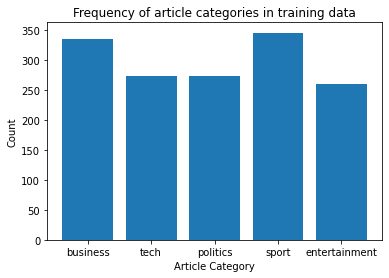

In [43]:
# Print the unique categories present in the training dataset, and make a bar plot of their relative frequencies
print("The categories of article present in the training data are:", train_data.iloc[:, 2].unique())

# Draw a histogram of the frequencies of categories in the training data.
counts = list(train_data.groupby("Category").count().iloc[:, 0])
Categories = list(train_data.iloc[:, 2].unique())

plt.bar(Categories, counts)
plt.xlabel("Article Category")
plt.ylabel("Count")
plt.title("Frequency of article categories in training data")
plt.show()

In [44]:
# This cell does an initial inspection of testdf
print(test_data.info())
test_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  735 non-null    int64 
 1   Text       735 non-null    object
dtypes: int64(1), object(1)
memory usage: 11.6+ KB
None


,ArticleId,Text
0,1018,qpr keeper day heads for preston queens park r...
1,1319,software watching while you work software that...
2,1138,d arcy injury adds to ireland woe gordon d arc...
3,459,india s reliance family feud heats up the ongo...
4,1020,boro suffer morrison injury blow middlesbrough...
